In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#stop_words are those words which present in almost in every text
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
X=[]
Y=[]
for category in os.listdir('C:\\Users\\VIGNESH\\3.1. Solution\\Datasets'):
    for document in os.listdir('C:\\Users\\VIGNESH\\3.1. Solution\\Datasets\\'+category):
         with open("""C:\\Users\\VIGNESH\\3.1. Solution\\Datasets\\"""+category+"\\"+ document , "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [5]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [6]:
#example of re.split()
sample_text="hi, ...ga hga g./ghagahg.g.$$$3hga"
print(re.split(r'\W+',sample_text))

['hi', 'ga', 'hga', 'g', 'ghagahg', 'g', '3hga']


In [7]:
dic={}
for i in range(len(x_train)):
    word=x_train[i][1].lower()
    stripped=re.split(r'\W+',word)
    for s in stripped:
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'newsgroups': 15285,
 'talk': 9184,
 'politics': 5887,
 'mideast': 1287,
 'path': 15243,
 'cantaloupe': 19534,
 'srv': 24207,
 'cmu': 39159,
 'edu': 123342,
 'das': 4577,
 'news': 25774,
 'harvard': 5234,
 'noc': 4643,
 'near': 5137,
 'net': 19075,
 'howland': 8222,
 'reston': 8200,
 'ans': 8288,
 'usc': 2193,
 'sol': 903,
 'ctr': 829,
 'columbia': 1942,
 'cunixb': 268,
 'peter': 698,
 'garfiel': 35,
 'freeman': 109,
 'subject': 16157,
 'absood': 10,
 'message': 16454,
 'sender': 8299,
 'usenet': 6145,
 'network': 1466,
 'nntp': 7054,
 'posting': 7344,
 'host': 6665,
 'organization': 14872,
 'university': 7454,
 'date': 15559,
 'mon': 1489,
 'apr': 15378,
 'gmt': 13329,
 'lines': 15695,
 'fellow': 140,
 'columbian': 2,
 'must': 2261,
 'ask': 1054,
 'say': 3886,
 'engage': 79,
 'fantasies': 25,
 'arafat': 20,
 'terrorist': 151,
 'happens': 403,
 'lot': 1601,
 'pull': 178,
 'among': 701,
 'palestinians': 180,
 'can': 14696,
 'ignore': 228,
 'two': 3825,
 'facts': 401,
 'doubt': 572,
 'p

In [8]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123342),
 ('cmu', 39159),
 ('com', 37351),
 ('news', 25774),
 ('not', 24956),
 ('srv', 24207),
 ('cantaloupe', 19534),
 ('net', 19075),
 ('message', 16454),
 ('subject', 16157),
 ('lines', 15695),
 ('date', 15559),
 ('apr', 15378),
 ('newsgroups', 15285),
 ('path', 15243),
 ('organization', 14872),
 ('can', 14696),
 ('state', 14103),
 ('gmt', 13329),
 ('ohio', 11886),
 ('one', 11586),
 ('will', 11354),
 ('writes', 11025),
 ('article', 10060),
 ('references', 9684),
 ('comp', 9651),
 ('talk', 9184),
 ('misc', 8837),
 ('sender', 8299),
 ('ans', 8288),
 ('howland', 8222),
 ('reston', 8200),
 ('don', 7987),
 ('like', 7852),
 ('people', 7832),
 ('just', 7528),
 ('university', 7454),
 ('posting', 7344),
 ('nntp', 7054),
 ('mps', 6906),
 ('know', 6818),
 ('host', 6665),
 ('sci', 6596),
 ('get', 6528),
 ('think', 6364),
 ('zaphod', 6211),
 ('usenet', 6145),
 ('may', 6035),
 ('alt', 5966),
 ('politics', 5887),
 ('windows', 5677),
 ('also', 5606),
 ('rutgers', 5343),
 ('time', 5247),
 (

In [9]:
import matplotlib.pyplot as plt

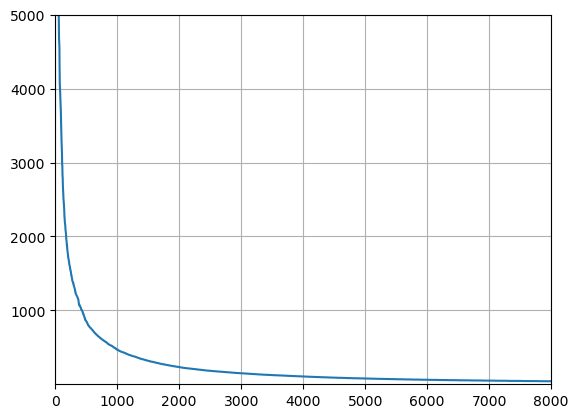

In [10]:
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [11]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'sender',
 'ans',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'think',
 'zaphod',
 'usenet',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'rutgers',
 'time',
 'harvard',
 'near',
 'eng',
 'use',
 'new',
 'rec',
 'good',
 'system',
 'noc',
 'sei',
 'well',
 'crabapple',
 'das',
 'soc',
 'xref',
 'now',
 'cis',
 'even',
 'see',
 'way',
 'religion',
 'europa',
 'gtefsd',
 'ece',
 'uunet',
 'world',
 'org',
 'make',
 'say',
 'christian',
 'two',
 'gov',
 'many',
 'god',
 'first',
 'much',
 'right',
 'max',
 'rochester',
 'club',
 'distribution',
 'space',
 'mail',
 'andrew',
 'gatech',
 'want',
 'anyone',
 'udel',

In [12]:
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    for j in word:
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [13]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [14]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print(len(x_train_dataset))
print(len(y_train))
print("--------------------------")
print(x_test_dataset)
print(len(x_test_dataset))

[[9 1 0 ... 0 0 0]
 [5 1 1 ... 0 0 0]
 [3 2 0 ... 0 0 0]
 ...
 [2 1 6 ... 0 0 0]
 [6 3 7 ... 0 0 0]
 [7 4 8 ... 0 0 0]]
14997
14997
--------------------------
[[ 9  3  1 ...  0  0  0]
 [11  7  0 ...  0  0  0]
 [ 4  1  6 ...  0  0  0]
 ...
 [ 8  3  5 ...  0  0  0]
 [16  5  2 ...  0  0  0]
 [14  2  3 ...  0  0  0]]
5000


### Self Implementation of Naive Bayes

In [15]:
#creating our own dictionary
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        x_train_with_i=x_train_dataset[y_train==i]
        temp2=x_train_with_i.shape[0]
        count[i]={}
        for feature in answer1:
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    return count
        
        

In [22]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
     #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        if xj==0:
            current_prob=0
        else:
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
        

In [17]:
def predict_for_single(x_test,dic):
    first_run=True
    best_prob=-1000
    best_class=-1
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [18]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [19]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [23]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)

In [24]:
dictionary

{'total_doc': 14997,
 'alt.atheism': {'edu': 6826,
  'cmu': 2006,
  'com': 2346,
  'news': 1431,
  'not': 2316,
  'srv': 1188,
  'cantaloupe': 929,
  'net': 1021,
  'message': 768,
  'subject': 810,
  'lines': 773,
  'date': 769,
  'apr': 785,
  'newsgroups': 744,
  'path': 738,
  'organization': 704,
  'can': 1110,
  'state': 627,
  'gmt': 651,
  'ohio': 549,
  'one': 914,
  'will': 561,
  'writes': 901,
  'article': 709,
  'references': 690,
  'comp': 1,
  'talk': 681,
  'misc': 336,
  'sender': 338,
  'ans': 432,
  'howland': 431,
  'reston': 431,
  'don': 658,
  'like': 430,
  'people': 739,
  'just': 511,
  'university': 322,
  'posting': 446,
  'nntp': 434,
  'mps': 363,
  'know': 424,
  'host': 355,
  'sci': 20,
  'get': 236,
  'think': 561,
  'zaphod': 325,
  'usenet': 266,
  'may': 262,
  'alt': 1143,
  'politics': 4,
  'windows': 0,
  'also': 253,
  'rutgers': 1,
  'time': 332,
  'harvard': 342,
  'near': 317,
  'eng': 296,
  'use': 145,
  'new': 130,
  'rec': 21,
  'good': 3

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [26]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.8716
[[215   0   1   0   0   0   0   3   3   3   0   0   0   1   1   0   0   1
    3  34]
 [  0 226   8  13   6  13   3   0   0   1   0   1   5   5   0   0   0   0
    0   0]
 [  0  10 190  21   1  20   2   0   0   0   0   0   2   0   0   0   0   0
    2   0]
 [  0   7   2 210  33   1   2   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   0  13 243   0   3   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  27  13   5   5 196   1   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   3   3   0 234   1   0   0   0   0   8   1   0   0   0   0
    1   0]
 [  0   1   0   0   0   0   9 223   4   0   0   0   6   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   0   5   2 234   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   1   0   0 199  15   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   3   4 250   0   0   0   0   0   0   0
    0   0]
 [  0   7   0   0   0   0   0   0  

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [28]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8983129959325198
Score on testing data: 0.8604
[[201   0   1   0   0   0   0   4   4   0   0   0   0   0   2   0   1   2
    1  49]
 [  0 221   9  13  10   8   6   2   0   1   0   0   7   3   1   0   0   0
    0   0]
 [  0   4 205  13   1  16   3   3   0   0   0   1   1   1   0   0   0   0
    0   0]
 [  0   6   7 200  36   0   4   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   1   1  15 238   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  24  22   9   4 181   2   2   1   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   0   0   3   4   0 235   2   0   0   0   0   6   0   0   0   1   0
    0   0]
 [  0   1   0   0   1   0   6 226   5   0   2   0   2   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   0   3   2 236   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   3   2 200   8   0   0   0   0   0   0   0
    0   0]
 [  1   0   0   0   0   0   3   0   4   6 245   0   0   0   0   0   0   0
   

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.86 on testing_data,whereas self implemented classifier gave 0.87 on testing data,which is very close.